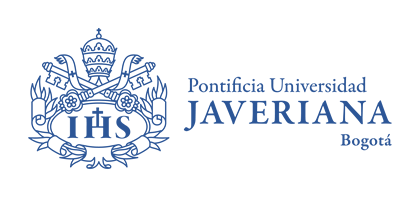

# **Segunda entrega del proyecto - Procesamiento de Lenguaje Natural**

### **Realizado por:**

- Sebastián Herrera
- Carlos Másmela
- Yudy Pedraza

### **Resumen:**

El siguiente Notebook tiene como propósito mostrar una solución al problema de **clasificación** de la búsqueda de canciones con el modelo **Modelos Clásicos - No Léxico**. Se aclara que para pode realizar lo anterior fue necesario un preprocesamiento y limpieza de la data.

In [1]:
import pandas
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics
import plotly.express as px
import auto_classifier
import shap
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost.sklearn

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df = pandas.read_csv("./database_no_lexico.csv")
df = df.drop(["Artista", "Titulo", "Cancion", "normalize_2"], axis=1)
df = df.dropna()
df

,Genero,diversidad_lexica,numero_oraciones,palabras_promedio_oraciones,stop_words,alpha_words,noun,adj,verb,pron,...,Condicional,Presente perfecto,Futuro perfecto,Pluscuamperfecto,Pretérito anterior,Condicional perfecto,Indicativo,Subjuntivo,Imperativo Afirmativo,Imperativo Negativo
0,0,0.375839,1,274.000000,81.0,274.0,40.0,23.0,37.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20.0,3.0,0.0,0.0
1,0,0.463203,1,221.000000,127.0,221.0,26.0,17.0,55.0,35.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36.0,5.0,0.0,0.0
2,0,0.357143,1,314.000000,217.0,314.0,42.0,17.0,49.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,36.0,6.0,0.0,0.0
3,0,0.495763,1,220.000000,117.0,212.0,47.0,15.0,24.0,21.0,...,1.0,0.0,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0
4,0,0.425676,1,269.000000,196.0,266.0,29.0,10.0,42.0,61.0,...,3.0,0.0,0.0,0.0,0.0,0.0,36.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,4,0.387435,16,22.187500,220.0,333.0,63.0,23.0,47.0,48.0,...,0.0,0.0,0.0,0.0,0.0,0.0,31.0,2.0,1.0,0.0
3059,4,0.365591,5,66.600000,180.0,287.0,32.0,10.0,63.0,52.0,...,0.0,0.0,0.0,0.0,0.0,0.0,33.0,4.0,0.0,0.0
3060,4,0.342767,1,287.000000,189.0,349.0,63.0,27.0,79.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,42.0,4.0,1.0,0.0
3061,4,0.347594,3,116.333333,305.0,448.0,87.0,30.0,78.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,62.0,3.0,0.0,0.0


In [3]:
df_train, df_test = sklearn.model_selection.train_test_split(df, test_size=0.3, random_state=42)
df_train = pandas.DataFrame(df_train)
df_test = pandas.DataFrame(df_test)

X_train = df_train.drop(["Genero"], axis=1).values
y_train = df_train["Genero"].values

X_test = df_test.drop(["Genero"], axis=1).values
y_test = df_test["Genero"].values


In [4]:
model_rfc = sklearn.ensemble.RandomForestClassifier()

In [5]:
model_rfc.fit(X_train, y_train)

RandomForestClassifier()

In [6]:
train_predicions = model_rfc.predict(X_train)

In [7]:
confusion_matrix_train = sklearn.metrics.confusion_matrix(y_true=y_train, y_pred=train_predicions)

fig = px.imshow(
    confusion_matrix_train,
    text_auto=".2d",
    color_continuous_scale="reds",
    # x=["0", "1"],
    # y=["0", "1"],
    aspect="auto",
)
fig.update_layout(title="Matriz de confusión TRAIN", autosize=False, template="ggplot2", width=400, height=300, coloraxis_showscale=False)
fig.show()


In [8]:
test_predictions = model_rfc.predict(X_test)

In [10]:
# Accuracy sigue siendo el mismo
accuracy_test = sklearn.metrics.accuracy_score(y_true=y_test, y_pred=test_predictions)

# Recall multiclase
recall_test = sklearn.metrics.recall_score(y_true=y_test, y_pred=test_predictions, average="weighted")  # Puedes usar 'micro', 'macro', 'weighted', etc. según tu preferencia.

# F1 Score multiclase
f1_score_test = sklearn.metrics.f1_score(y_true=y_test, y_pred=test_predictions, average="weighted")  # Igualmente, puedes usar 'micro', 'macro', 'weighted', etc.

print(f"Accuracy test: {accuracy_test}")
print(f"Recall test: {recall_test}")
print(f"F1 test: {f1_score_test}")


Accuracy test: 0.6300326441784548
Recall test: 0.6300326441784548
F1 test: 0.6176854331673136


In [11]:
df_results = auto_classifier.auto_classifier(X_train, y_train, X_test, y_test)
df_results

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data points in the train set: 2144, number of used features: 33
[LightGBM] [Info] Start training from score -1.604320
[LightGBM] [Info] Start training from score -1.625423
[LightGBM] [Info] Start training from score -1.567870
[LightGBM] [Info] Start training from score -1.608972
[LightGBM] [Info] Start training from score -1.642150


c:\Users\sejo_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,Model,Accuracy Train,Recall Train,F1 Train,Accuracy Test,Recall Test,F1 Test
0,AdaBoostClassifier(),0.509795,0.509795,0.487129,0.509249,0.509249,0.488085
1,<catboost.core.CatBoostClassifier object at 0x...,1.0,1.0,1.0,0.676823,0.676823,0.67179
2,ExtraTreesClassifier(),1.0,1.0,1.0,0.620239,0.620239,0.607597
3,GradientBoostingClassifier(),0.849813,0.849813,0.848921,0.628945,0.628945,0.622937
4,KNeighborsClassifier(),0.66278,0.66278,0.650701,0.542982,0.542982,0.51904
5,LGBMClassifier(),1.0,1.0,1.0,0.653972,0.653972,0.648531
6,LogisticRegression(),0.480877,0.480877,0.465288,0.445049,0.445049,0.41746
7,GaussianNB(),0.437966,0.437966,0.408283,0.452666,0.452666,0.417819
8,RandomForestClassifier(),1.0,1.0,1.0,0.609358,0.609358,0.594458
9,SVC(),0.516325,0.516325,0.49469,0.527748,0.527748,0.50776


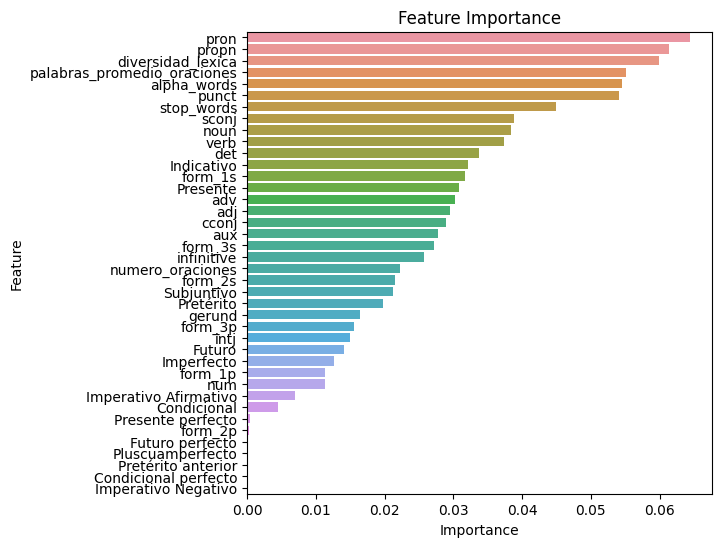

In [13]:
# Get feature importances
importances = model_rfc.feature_importances_

# Create a DataFrame with feature names and importance scores
importance_df = pandas.DataFrame({"Feature": df.drop(["Genero"], axis=1).columns, "Importance": importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Create a bar plot of feature importances
plt.figure(figsize=(6, 6))
sns.barplot(data=importance_df, x="Importance", y="Feature", orient="h")
plt.title("Feature Importance")
plt.show()

(5, 2144, 40)


c:\Users\sejo_\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\plots\_beeswarm.py:699: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



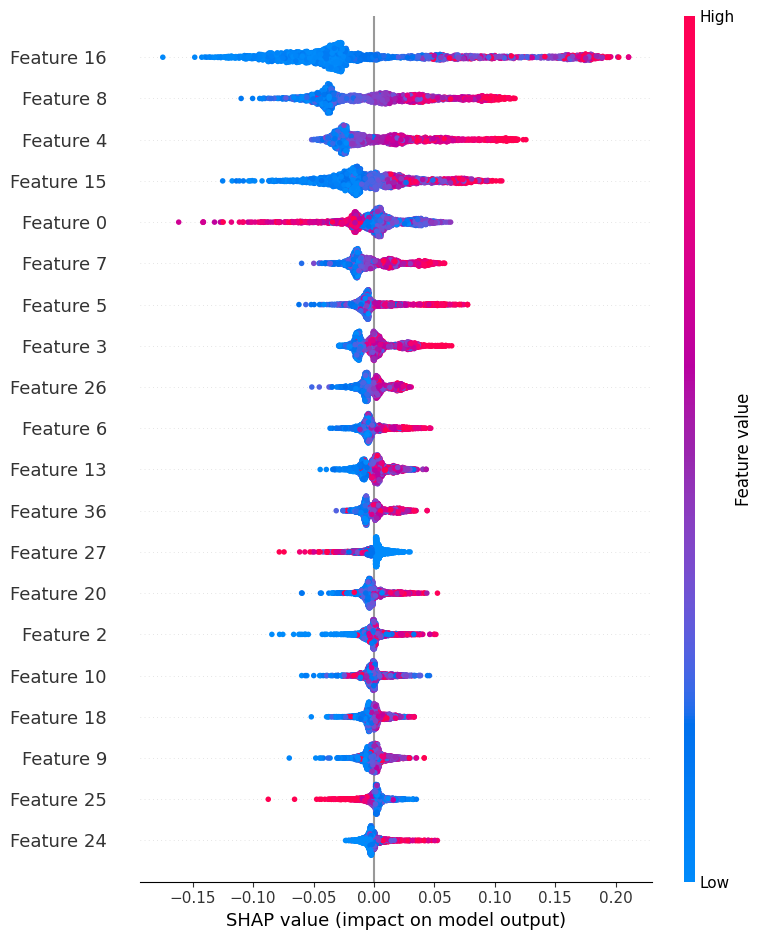

In [14]:
explainer = shap.TreeExplainer(model_rfc)
shap_values = numpy.array(explainer.shap_values(X_train))
print(shap_values.shape)
plt.figure(figsize=(6, 6))
shap.summary_plot(shap_values[1], X_train)